# Telecom Churn Problem

# Business Problem
Business problem is very simple, There is a wireless telecom company who wants to retain their existing customers who may churn, for that they have to know which existing customers has the highest probability of leaving the company.



# Data
We have 7043 rows with 20 features and 1 target variable, Every row tells us different customer details and whether they churned or not after 2 months of observation

# Machine Learning Problem
So Converting a Business problem to a Machine Learning problem, This seems to be a simple binary classification problem in which we have 2 classes, "yes" and "no".

We have some numerical features, some categorical features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics._classification import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df=pd.read_csv("cd1.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Understanding the data and manipulation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print(display(df))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


None


In [5]:
print("Number of data points:",df.shape[0])
print("Number of features:",df.shape[1])
print("Features:",df.columns.values)

Number of data points: 7043
Number of features: 21
Features: ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Observation

In [7]:
duplicate=df[df.duplicated()]
duplicate.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# Observation
No duplicates

In [8]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Imbalanced data

It seems that data is imbalanced, as number of "yes" is 1869 and number of "no" is 5174, we will balanced the data with upsampling

Male      3555
Female    3488
Name: gender, dtype: int64


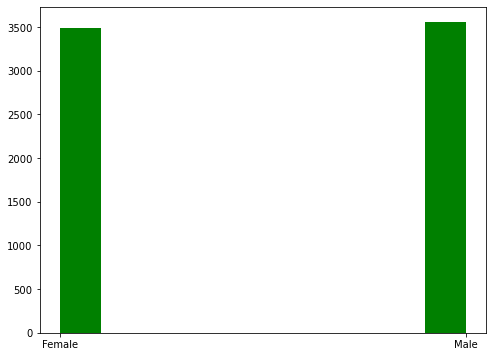

In [9]:
#lets see variable one by one
#gender 
#univariate analysis
#gender #gender has only two values, male and female
gender_count=df['gender'].value_counts()
print(gender_count)

plt.figure(figsize=(8,6))
plt.hist(df['gender'],facecolor='g')
plt.show()


 There is no such difference in number of male and number of female

In [10]:
#now lets see how gender is affecting our target variable "churn"
df1=df.replace({'Churn': {'Yes': 1, 'No': 0}})
df1[['gender', 'Churn']].groupby('gender').mean()

,Churn
gender,
Female,0.269209
Male,0.261603


Mean values are aprroximately same that mean it is not contributing as much to 
pretict churning so we wont take gender as a feature value

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


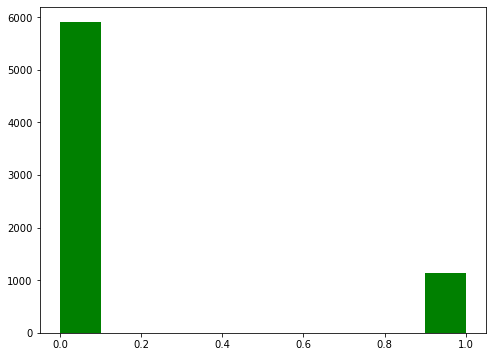

                  Churn
SeniorCitizen          
0              0.236062
1              0.416813


In [11]:
count=df['SeniorCitizen'].value_counts()
print(count)

plt.figure(figsize=(8,6))
plt.hist(df['SeniorCitizen'],facecolor='g')
plt.show()


print(df1[['SeniorCitizen', 'Churn']].groupby('SeniorCitizen').mean())

32.37114865824223
29.0
29.0
15.0
61.0


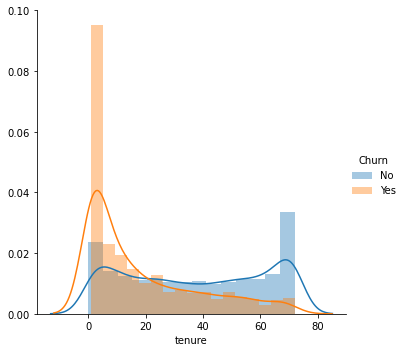

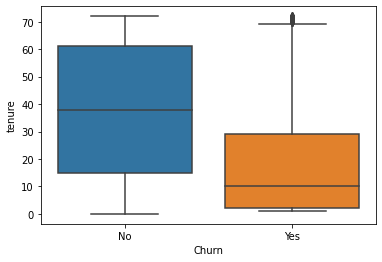

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

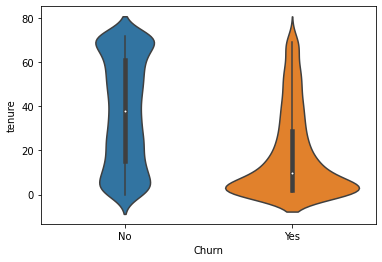

In [12]:
#4th feature is tenure, its for a change a continous variable
a=np.mean(df1.tenure)
print(a)
b=np.median(df1.tenure)
print(b)

sa=df.loc[df['Churn']=='Yes']
sb=df.loc[df['Churn']=='No']

c=np.percentile(sa['tenure'],75)
print(c)

d=np.percentile(sb['tenure'],25)
print(d)

e=np.percentile(sb['tenure'],75)
print(e)

sns.FacetGrid(df, hue="Churn", size=5) \
   .map(sns.distplot, "tenure",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Churn',y='tenure', data=df)
plt.show()

sns.violinplot(x='Churn',y='tenure', data=df)


Tenure is a continous variable, so in first plot we can the pdf for both yes and no are highly overlapping, so it is very difficult to see but we can say that for lower values of tenure number of people who churn are more, for higher values of tenure people who churn are less

In second plot, i plot the box plot, which tells us 25th percentile, 50th percentile, 75th percentile and tell us if there are outliers in the data.
 
  1. 25 percent of the total people who did not churn have tenure less than 20.
  
  2. we can easily say that  75% of the total people who churn from the company 
     had a tenure less than 29.
    
  3. 50% of the people who stayed with the company have tenure in between 15 to      61, this information could be great for the company who wants to give          incentive

Yes    6361
No      682
Name: PhoneService, dtype: int64


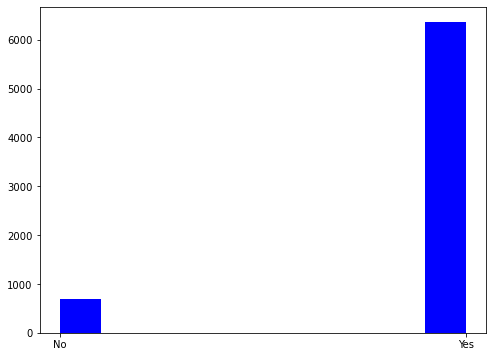

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [13]:
#5th variable is phoneservice
count=df['PhoneService'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['PhoneService'],facecolor='b')
plt.show()

df1[['PhoneService', 'Churn']].groupby('PhoneService').mean()


Not much differnce in mean, leaving the feature.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


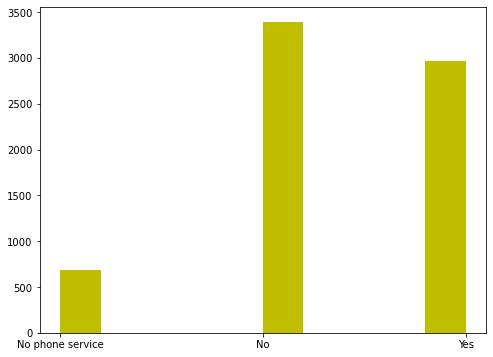

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [14]:
#6th variable is MultipleLines
count=df["MultipleLines"].value_counts()
print(count)

plt.figure(figsize=(8,6))
plt.hist(df["MultipleLines"],facecolor="y")
plt.show()

df1

Means are similar but i am not leaving this feature.

No     3641
Yes    3402
Name: Partner, dtype: int64


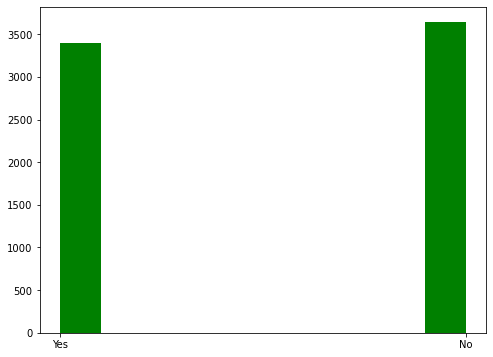

,Churn
Partner,
No,1200
Yes,669


In [15]:
count=df['Partner'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['Partner'],facecolor='g')
plt.show()

df1[['Partner', 'Churn']].groupby('Partner').sum()

No     4933
Yes    2110
Name: Dependents, dtype: int64


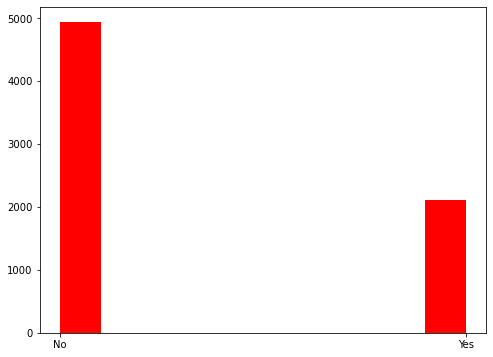

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [16]:
count=df['Dependents'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['Dependents'],facecolor='r')
plt.show()

df1[['Dependents', 'Churn']].groupby('Dependents').mean()


32.37114865824223
29.0
29.0
15.0
61.0


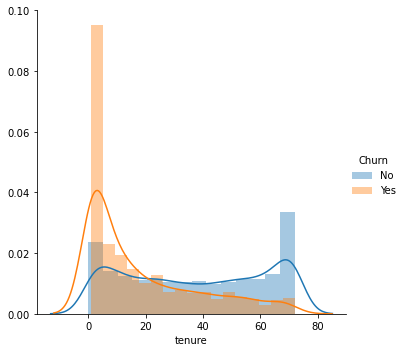

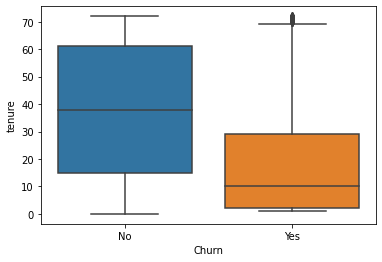

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

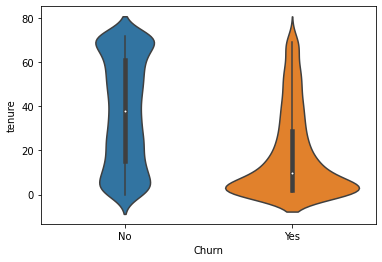

In [17]:
a=np.mean(df1.tenure)
print(a)
b=np.median(df1.tenure)
print(b)

sa=df.loc[df['Churn']=='Yes']
sb=df.loc[df['Churn']=='No']

c=np.percentile(sa['tenure'],75)
print(c)

d=np.percentile(sb['tenure'],25)
print(d)

e=np.percentile(sb['tenure'],75)
print(e)

sns.FacetGrid(df, hue="Churn", size=5) \
   .map(sns.distplot, "tenure",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Churn',y='tenure', data=df)
plt.show()

sns.violinplot(x='Churn',y='tenure', data=df)

Yes    6361
No      682
Name: PhoneService, dtype: int64


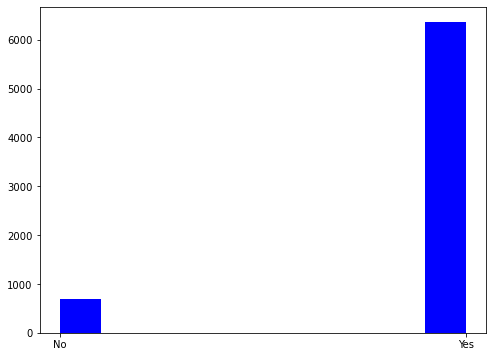

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [18]:


count=df['PhoneService'].value_counts()
print(count)

plt.figure(figsize=(8,6))
plt.hist(df['PhoneService'],facecolor='b')
plt.show()
df1[['PhoneService','Churn']].groupby('PhoneService').mean()


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


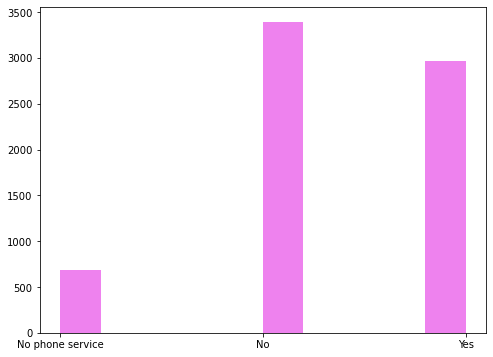

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [19]:
count=df['MultipleLines'].value_counts()
print(count)
plt.figure(figsize=(8,6))
plt.hist(df['MultipleLines'],facecolor='violet')
plt.show()
df1[['MultipleLines','Churn']].groupby('MultipleLines').mean()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


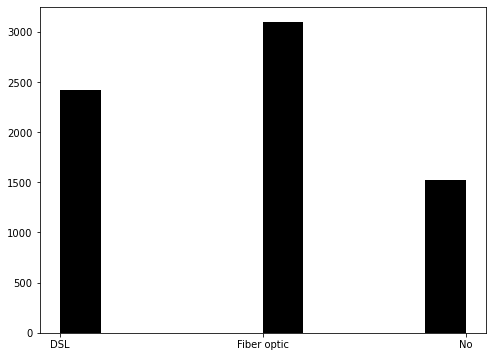

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [20]:
count=df['InternetService'].value_counts()
print(count)
plt.figure(figsize=(8,6))
plt.hist(df['InternetService'],facecolor='black')
plt.show()
df1[['InternetService','Churn']].groupby('InternetService').mean()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


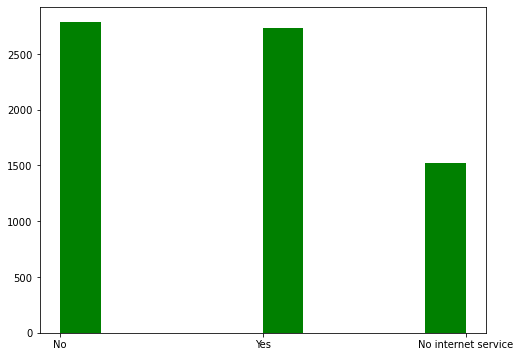

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [21]:
count=df['StreamingMovies'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['StreamingMovies'],facecolor='g')
plt.show()

df1[['StreamingMovies', 'Churn']].groupby('StreamingMovies').mean()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


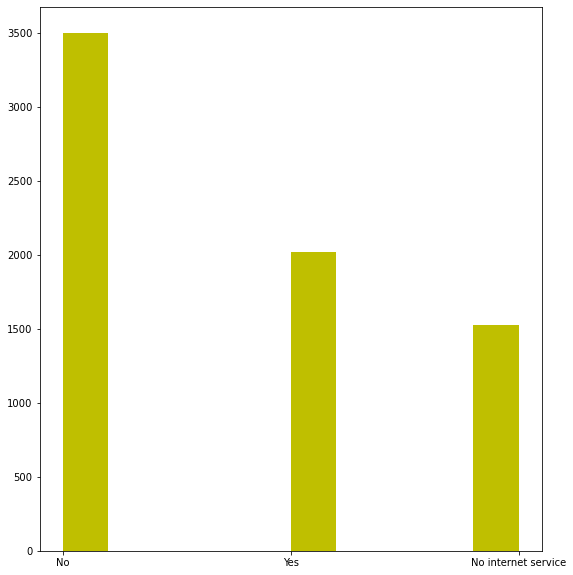

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [22]:
count=df['OnlineSecurity'].value_counts()
print(count)
plt.figure(figsize=(9,10))
plt.hist(df['OnlineSecurity'],facecolor='y')
plt.show()
df1[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

64.76169246059922
70.35
94.2
56.15
25.1
88.4


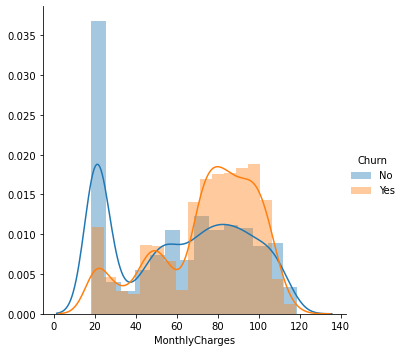

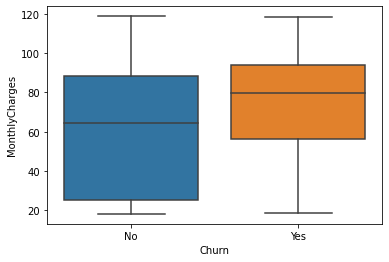

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

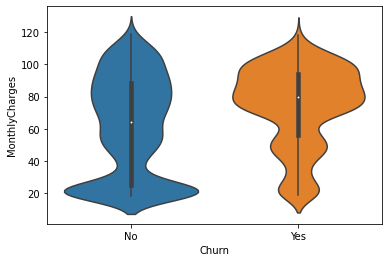

In [23]:
a=np.mean(df1.MonthlyCharges)
print(a)
b=np.median(df1.MonthlyCharges)
print(b)

sa=df.loc[df['Churn']=='Yes']
sb=df.loc[df['Churn']=='No']

c=np.percentile(sa['MonthlyCharges'],75)
print(c)

n=np.percentile(sa['MonthlyCharges'],25)
print(n)

d=np.percentile(sb['MonthlyCharges'],25)
print(d)

e=np.percentile(sb['MonthlyCharges'],75)
print(e)

sns.FacetGrid(df, hue="Churn", size=5) \
   .map(sns.distplot, "MonthlyCharges",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Churn',y='MonthlyCharges', data=df)
plt.show()

sns.violinplot(x='Churn', y='MonthlyCharges', data=df)

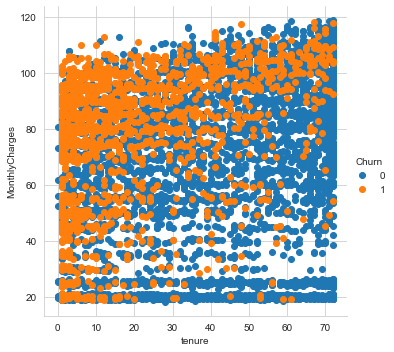

In [24]:
sns.set_style("whitegrid");
sns.FacetGrid(df1,hue="Churn",size=5) \
    .map(plt.scatter,"tenure","MonthlyCharges") \
    .add_legend();
plt.show()

In [25]:
data=df1.drop(['customerID','gender','PhoneService','TotalCharges'],axis=1)


In [26]:
data.shape

(7043, 17)

In [27]:
target=data['Churn']
target.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [28]:
categorical = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity',  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Contract']
X = pd.get_dummies(data, columns=categorical, drop_first=True)


In [29]:
scaling = MinMaxScaler()
ten = scaling.fit_transform(df[['tenure']])
mc = scaling.fit_transform(df[['MonthlyCharges']])
X['tenure'] = ten
X['MonthlyCharges'] = mc


In [30]:
X.head()


,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.027778,0.354229,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [31]:
X.columns


Index(['tenure', 'MonthlyCharges', 'Churn', 'SeniorCitizen_1', 'Partner_Yes',
       'Dependents_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [32]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   float64
 1   MonthlyCharges                         7043 non-null   float64
 2   Churn                                  7043 non-null   int64  
 3   SeniorCitizen_1                        7043 non-null   uint8  
 4   Partner_Yes                            7043 non-null   uint8  
 5   Dependents_Yes                         7043 non-null   uint8  
 6   MultipleLines_No phone service         7043 non-null   uint8  
 7   MultipleLines_Yes                      7043 non-null   uint8  
 8   InternetService_Fiber optic            7043 non-null   uint8  
 9   InternetService_No                     7043 non-null   uint8  
 10  OnlineSecurity_No internet service     7043 non-null   uint8  
 11  Onli

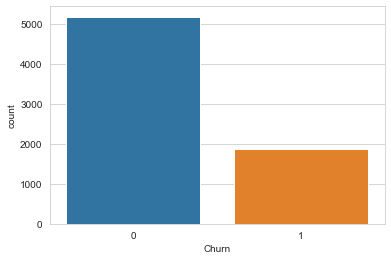

0    5174
1    1869
Name: Churn, dtype: int64

In [33]:
import seaborn as sns
sns.countplot('Churn', data=X)
plt.show()
#to be exact, lets find out the number

data['Churn'].value_counts()


In [34]:
no_churn=X[X['Churn']==0]
yes_churn=X[X['Churn']==1]
upsampled = yes_churn.sample(n=len(no_churn), replace=True)
X1 = no_churn.append(upsampled).reset_index(drop=True)
print(upsampled.shape)
print(X1.shape)

X1.head()

(5174, 28)
(10348, 28)


,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.305556,0.704975,0,0,0,1,0,1,1,0,...,0,1,0,0,1,1,0,0,0,0
4,0.138889,0.114428,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


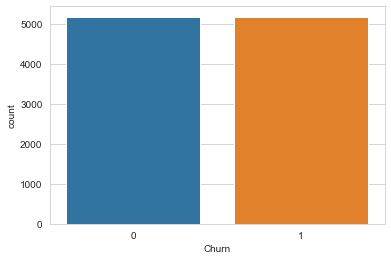

(10348, 28)

In [35]:
sns.countplot('Churn', data=X1)
plt.show()
X1.shape

In [36]:
x2=X1.drop('Churn',axis=1)

y2=X1['Churn']

# Logistic Regression

In [37]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)

model=GridSearchCV(LogisticRegression(),tuned_parameters,scoring='accuracy')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))


LogisticRegression(C=100)
0.768438003220612


In [38]:
model=GridSearchCV(LogisticRegression(),tuned_parameters,scoring='f1')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))


LogisticRegression(C=100)
0.7759426612651917


# K Nearest Neighbour

In [39]:
# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
# Create KNN classifier

tuned_parameters=[{'n_neighbors':[3,5,7,9]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=42)
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,tuned_parameters,scoring='f1')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)
print(modelknn.score(X_test,y_test))
# Fit the classifier to the data

KNeighborsClassifier(n_neighbors=3)
0.8160953800298062


# Decision Tree

In [40]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=None)
tuned_parameters=[{'max_depth':[5,8,10]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=42)

model=GridSearchCV(clf,tuned_parameters,scoring='f1')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))


DecisionTreeClassifier(max_depth=10, min_samples_split=5)
0.8099074903014025
0.8602987322706164


# Random Forest

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
clf1 = RandomForestClassifier()
tuned_parameters1=[{'n_estimators':[100,200,300]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=42)

model=GridSearchCV(clf1,tuned_parameters1,scoring='f1')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))

RandomForestClassifier(n_estimators=300)
0.8952618453865336


# SVM(support vector machine)

In [42]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=0)
model.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [43]:
y_test_predict=model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm=confusion_matrix(y_test,y_test_predict)

In [46]:
from sklearn import svm
tuned_parameters=[{'n_neighbors':[3,4,5,6]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=42)
tuned_parameters=[{'C':[0.001, 0.01, 0.1, 1, 10]}]
clf= svm.SVC(kernel='rbf')
smodel=GridSearchCV(clf,tuned_parameters,scoring='f1',cv=3)

smodel.fit(X_train,y_train)

print(smodel.best_estimator_)
print(smodel.score(X_test,y_test))
# Fit the classifier to the data

SVC(C=10)
0.8099378881987578


In [47]:
svm_test_prediction=smodel.predict(X_test)
svm_train_predictions=smodel.predict(X_train)

In [48]:
from sklearn.metrics import f1_score
X_svmtest_F1score=f1_score(y_test,svm_test_prediction,average='weighted')
print("Testing f1 score is",X_svmtest_F1score) #f1 score on test data

X_svmtrain_F1score=f1_score(y_train,svm_train_predictions,average='weighted')
print("Training f1 score is",X_svmtrain_F1score) #f1 score on train data

Testing f1 score is 0.8024371092045951
Training f1 score is 0.8632801915966258


In [49]:
pip install https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2


  Using cached https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2 (21 kB)
Note: you may need to restart the kernel to use updated packages.


In [50]:
import prettytable
from prettytable import PrettyTable
columns=(["ALGORITHM", "F1_SCORE_WEIGHTED"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["Logistic Regression","KNN","Decision Tree","Random Forest","SVM"])
myTable.add_column(columns[1], ['0.77','0.79','0.82','0.88','0.80'])

print(myTable)


+---------------------+-------------------+
|      ALGORITHM      | F1_SCORE_WEIGHTED |
+---------------------+-------------------+
| Logistic Regression |        0.77       |
|         KNN         |        0.79       |
|    Decision Tree    |        0.82       |
|    Random Forest    |        0.88       |
|         SVM         |        0.80       |
+---------------------+-------------------+


As the observation from f1 scoring of various algorithms it is observed that random forest is giving the higher accurancy as random forest overcome the problem of overfitting